### Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Loading the dataset

In [2]:
#Loading the dataset to a Pandas DataFrame
dataset_train = pd.read_csv("fraudTrain.csv")
dataset_test = pd.read_csv("fraudTest.csv")
print("dataset_train: " , dataset_train.shape)
print("dataset_test: " , dataset_test.shape)

dataset_train:  (1296675, 23)
dataset_test:  (555719, 23)


### Checking the number of missing values in each col

In [3]:
print(dataset_train.isnull().sum())
print(dataset_test.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat            

### Dropping if there are any duplicate entries

In [4]:
dataset_train.drop_duplicates(inplace=True)
print("dataset_train: ",dataset_train.shape)

dataset_test.drop_duplicates(inplace=True)
print("dataset_test: ",dataset_test.shape)

dataset_train:  (1296675, 23)
dataset_test:  (555719, 23)


### Concatenate two datasets

In [5]:
# create a new dataframe
df1 = pd.concat([dataset_train,dataset_test], axis=0)
print("New dataset: ",df1.shape)
df1.head()

New dataset:  (1852394, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df1.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
dtype: int64

In [7]:
df2 = df1.drop(['Unnamed: 0','trans_date_trans_time','merchant','first','last','street','city','zip','lat','long','job','dob',
                'trans_num','merch_lat','merch_long'],axis='columns')
df2.head()

,cc_num,category,amt,gender,state,city_pop,unix_time,is_fraud
0,2703186189652095,misc_net,4.97,F,NC,3495,1325376018,0
1,630423337322,grocery_pos,107.23,F,WA,149,1325376044,0
2,38859492057661,entertainment,220.11,M,ID,4154,1325376051,0
3,3534093764340240,gas_transport,45.00,M,MT,1939,1325376076,0
4,375534208663984,misc_pos,41.96,M,VA,99,1325376186,0


In [8]:
df2['gender'] = df2['gender'].replace({'F': 0, 'M': 1})
df2.head()

,cc_num,category,amt,gender,state,city_pop,unix_time,is_fraud
0,2703186189652095,misc_net,4.97,0,NC,3495,1325376018,0
1,630423337322,grocery_pos,107.23,0,WA,149,1325376044,0
2,38859492057661,entertainment,220.11,1,ID,4154,1325376051,0
3,3534093764340240,gas_transport,45.00,1,MT,1939,1325376076,0
4,375534208663984,misc_pos,41.96,1,VA,99,1325376186,0


In [9]:
#find null values
df2.isnull().sum()

cc_num       0
category     0
amt          0
gender       0
state        0
city_pop     0
unix_time    0
is_fraud     0
dtype: int64

In [10]:
df2['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [11]:
df2['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [12]:
df2.nunique()

cc_num           999
category          14
amt            60616
gender             2
state             51
city_pop         891
unix_time    1819583
is_fraud           2
dtype: int64

### Resolving the high dimensionality problem 

#### Dealing with cc numbers

In [13]:
import re
df3 = df2.copy()

In [14]:
# define regex patterns for each card type
visa_regex = '^4[0-9]{12}(?:[0-9]{3})?$'
mastercard_regex = '^5[1-5][0-9]{14}$'
amex_regex = '^3[47][0-9]{13}$'
discover_regex = '^6(?:011|5[0-9]{2})[0-9]{12}$'
diners_regex = '^3(?:0[0-5]|[68][0-9])[0-9]{11}$'
jcb_regex = '^(?:2131|1800|35\d{3})\d{11}$'

In [15]:
# create a function to match each card type
def get_card_type(cc_num):
    if re.match(visa_regex, cc_num):
        return 'Visa'
    elif re.match(mastercard_regex, cc_num):
        return 'MasterCard'
    elif re.match(amex_regex, cc_num):
        return 'American Express'
    elif re.match(discover_regex, cc_num):
        return 'Discover'
    elif re.match(diners_regex, cc_num):
        return 'Diners Club - Carte Blanche'
    elif re.match(jcb_regex, cc_num):
        return 'JCB'
    else:
        return 'Other'

In [16]:
# apply the get_card_type function to the cc_num column
df3['cc_type'] = df3['cc_num'].astype(str).apply(get_card_type)

# drop the card number column
df3 = df3.drop('cc_num', axis=1)

In [17]:
df3['cc_type'].unique()

array(['Other', 'Diners Club - Carte Blanche', 'JCB', 'American Express',
       'Visa', 'Discover', 'MasterCard'], dtype=object)

In [18]:
df3.head()

,category,amt,gender,state,city_pop,unix_time,is_fraud,cc_type
0,misc_net,4.97,0,NC,3495,1325376018,0,Other
1,grocery_pos,107.23,0,WA,149,1325376044,0,Other
2,entertainment,220.11,1,ID,4154,1325376051,0,Diners Club - Carte Blanche
3,gas_transport,45.00,1,MT,1939,1325376076,0,JCB
4,misc_pos,41.96,1,VA,99,1325376186,0,American Express


In [19]:
df3.nunique()

category          14
amt            60616
gender             2
state             51
city_pop         891
unix_time    1819583
is_fraud           2
cc_type            7
dtype: int64

#### Dealing with unix time

In [20]:
import datetime
df4 = df3.copy()

In [21]:
# Convert Unix time to datetime format
df4['datetime'] = pd.to_datetime(df4['unix_time'], unit='s')

# Extract the day of the week from datetime and create a new column
df4['day'] = df4['datetime'].apply(lambda x: x.strftime('%A'))

# Extract the hour of the day
df4['hour'] = df4['datetime'].dt.hour

# Drop the old 'unix_time' and 'datetime' columns
df4.drop(['unix_time', 'datetime'], axis=1, inplace=True)

df4.tail()

,category,amt,gender,state,city_pop,is_fraud,cc_type,day,hour
555714,health_fitness,43.77,1,MO,519,0,Diners Club - Carte Blanche,Tuesday,23
555715,kids_pets,111.84,1,TX,28739,0,JCB,Tuesday,23
555716,kids_pets,86.88,0,WA,3684,0,Discover,Tuesday,23
555717,travel,7.99,1,ID,129,0,Visa,Tuesday,23
555718,entertainment,38.13,1,OK,116001,0,Visa,Tuesday,23


In [22]:
df4.head()

,category,amt,gender,state,city_pop,is_fraud,cc_type,day,hour
0,misc_net,4.97,0,NC,3495,0,Other,Sunday,0
1,grocery_pos,107.23,0,WA,149,0,Other,Sunday,0
2,entertainment,220.11,1,ID,4154,0,Diners Club - Carte Blanche,Sunday,0
3,gas_transport,45.00,1,MT,1939,0,JCB,Sunday,0
4,misc_pos,41.96,1,VA,99,0,American Express,Sunday,0


In [23]:
df4.nunique()

category       14
amt         60616
gender          2
state          51
city_pop      891
is_fraud        2
cc_type         7
day             7
hour           24
dtype: int64

In [24]:
def get_time_period(hour):
    if 6 <= hour < 12:
        return "morning"
    elif 12 <= hour < 13:
        return "noon"
    elif 13 <= hour < 18:
        return "afternoon"
    elif 18 <= hour < 21:
        return "evening"
    elif 21 <= hour < 24:
        return "night"
    else:
        return "dawn"

In [25]:
df4['time_period'] = df4['hour'].apply(get_time_period)

# Drop the old 'unix_time' and 'datetime' columns
df4.drop(['hour'], axis=1, inplace=True)

df4.nunique()

category          14
amt            60616
gender             2
state             51
city_pop         891
is_fraud           2
cc_type            7
day                7
time_period        6
dtype: int64

### Removing outliers

In [103]:
df5 = df4.copy()
df5.category = df5.category.apply(lambda x:x.strip())

category_stats = df5.groupby('category')['category'].agg('count').sort_values(ascending=False)
category_stats

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: category, dtype: int64

In [104]:
print(df5['amt'].describe())

count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64


In [105]:
df5.shape

(1852394, 9)

In [106]:
def remove_amt_outliers(df5):
    df5_out = pd.DataFrame()
    for key, subdf in df5.groupby('is_fraud'):
        m = np.mean(subdf.amt)
        st = np.std(subdf.amt)
        reduced_df5 = subdf[(subdf.amt>(m-st))& (subdf.amt<=(m+st))]
        df5_out = pd.concat([df5_out,reduced_df5],ignore_index=True)
    return df5_out

In [107]:
df6 = remove_amt_outliers(df5)
df6.shape

(1787623, 9)

In [108]:
print(df6['amt'].describe())

count    1.787623e+06
mean     5.432330e+01
std      5.606883e+01
min      1.000000e+00
25%      9.320000e+00
50%      4.519000e+01
75%      7.855000e+01
max      9.216200e+02
Name: amt, dtype: float64


0    1782450
1       5173
Name: is_fraud, dtype: int64

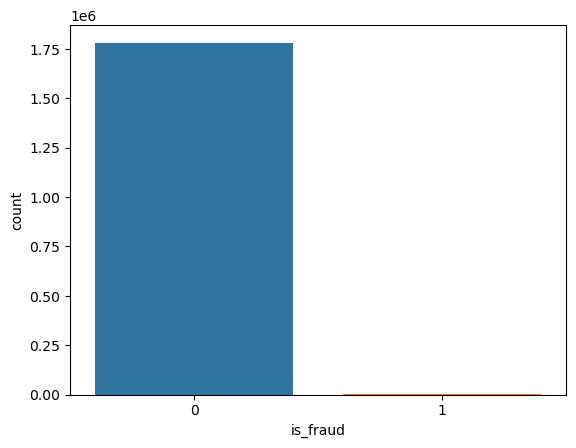

In [32]:
#checking distribution of legit transactions & fraudulent transactions
sns.countplot(x=df6['is_fraud'])
df6['is_fraud'].value_counts()

### One-Hot encoding

In [109]:
df7 = df6.copy()
df7.nunique()

category          14
amt            26765
gender             2
state             51
city_pop         891
is_fraud           2
cc_type            7
day                7
time_period        6
dtype: int64

In [110]:
# One-hot encode the categorical columns
cat_cols = ['category', 'state', 'cc_type', 'day','time_period']
df7 = pd.get_dummies(df7, columns=cat_cols)
pd.get_dummies(df7)

,amt,gender,city_pop,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,...,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,time_period_afternoon,time_period_dawn,time_period_evening,time_period_morning,time_period_night,time_period_noon
0,4.97,0,3495,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,107.23,0,149,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,220.11,1,4154,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,45.00,1,1939,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,41.96,1,99,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787618,209.84,0,743,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1787619,219.11,0,743,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1787620,868.09,1,14462,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1787621,289.27,1,14462,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [111]:
df7.nunique()

amt                       26765
gender                        2
city_pop                    891
is_fraud                      2
category_entertainment        2
                          ...  
time_period_dawn              2
time_period_evening           2
time_period_morning           2
time_period_night             2
time_period_noon              2
Length: 89, dtype: int64

In [112]:
print(df7.columns)

Index(['amt', 'gender', 'city_pop', 'is_fraud', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX', 'state

### Splitting the data into features and target

In [113]:
X = df7.drop('is_fraud',axis='columns')
X.head()

,amt,gender,city_pop,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,time_period_afternoon,time_period_dawn,time_period_evening,time_period_morning,time_period_night,time_period_noon
0,4.97,0,3495,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,107.23,0,149,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,220.11,1,4154,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,45.00,1,1939,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,41.96,1,99,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [114]:
Y = df7.is_fraud
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [115]:
Y.value_counts()

0    1782450
1       5173
Name: is_fraud, dtype: int64

 ### Splitting the train and test datasets

In [116]:
from sklearn.model_selection import train_test_split
# stratify=Y -> equally distribute y values in testing and training datasets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1787623, 88) (1430098, 88) (357525, 88)


In [117]:
Y_train.value_counts()

0    1425960
1       4138
Name: is_fraud, dtype: int64

In [118]:
Y_test.value_counts()

0    356490
1      1035
Name: is_fraud, dtype: int64

In [119]:
X_test.to_csv('testData.csv', index=False)

### Dealing with imbalanced data

In [120]:
train_df = pd.concat([X_train, Y_train], axis=1)

#### Using Random undersampling

In [121]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = train_df[train_df['is_fraud']==0]
minority_class = train_df[train_df['is_fraud']==1]

# Downsample majority class
downsampled_majority = resample(majority_class, 
                                 replace=False,    # sample without replacement
                                 n_samples=8276, # to match minority class
                                 random_state=42) # reproducible results

# Combine minority class with downsampled majority class
undersampled_df = pd.concat([downsampled_majority, minority_class])

# Shuffle the data
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

In [122]:
undersampled_df['is_fraud'].value_counts()

0    8276
1    4138
Name: is_fraud, dtype: int64

In [123]:
undersampled_df.shape

(12414, 89)

#### Splitting the data into features and target

In [124]:
X = undersampled_df.drop('is_fraud',axis='columns')
Y = undersampled_df.is_fraud
Y.value_counts()

0    8276
1    4138
Name: is_fraud, dtype: int64

#### Using ADASYN (Adaptive Synthetic Sampling)

In [125]:
X_resampled = X.copy()
Y_resampled = Y.copy()

In [126]:
from imblearn.over_sampling import ADASYN

# 1:1 ratio
ada = ADASYN(sampling_strategy=1)
X_ADASYN, Y_ADASYN = ada.fit_resample(X_resampled, Y_resampled)


In [127]:
Y_ADASYN.value_counts()

0    8276
1    8251
Name: is_fraud, dtype: int64

#### Using SMOTE (Synthetic Minority Over-sampling Technique)

In [128]:
X_resampled = X.copy()
Y_resampled = Y.copy()

In [129]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_SMOTE, Y_SMOTE = smote.fit_resample(X_resampled, Y_resampled)

In [130]:
Y_SMOTE.value_counts()

0    8276
1    8276
Name: is_fraud, dtype: int64

#### Using Cluster Centroids

In [131]:
X_resampled = X.copy()
Y_resampled = Y.copy()

In [132]:
from imblearn.under_sampling import ClusterCentroids

# define the ClusterCentroids undersampling object
cc = ClusterCentroids(sampling_strategy='auto', random_state=42)

# fit and apply the undersampling to the data
X_cc, Y_cc = cc.fit_resample(X_resampled, Y_resampled)

In [133]:
Y_cc.value_counts()

0    4138
1    4138
Name: is_fraud, dtype: int64

#### Saving resampled data

In [134]:
np.save('X_ADASYN.npy', X_ADASYN)
np.save('Y_ADASYN.npy', Y_ADASYN)

np.save('X_SMOTE.npy', X_SMOTE)
np.save('Y_SMOTE.npy', Y_SMOTE)

np.save('X_cc.npy', X_cc)
np.save('Y_cc.npy', Y_cc)

np.save('X_test.npy', X_test)
np.save('Y_test.npy', Y_test)

#### Loading data

In [135]:
X_ADASYN = np.load('X_ADASYN.npy')
Y_ADASYN = np.load('Y_ADASYN.npy')

X_SMOTE = np.load('X_SMOTE.npy')
Y_SMOTE = np.load('Y_SMOTE.npy')

X_cc = np.load('X_cc.npy')
Y_cc = np.load('Y_cc.npy')

X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

### Building the Binary Classification model

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, PrecisionRecallDisplay
from sklearn import metrics

In [137]:
# Define the models to evaluate
models = {
    'KNN': KNeighborsClassifier(),
    'Bagging+DT': BaggingClassifier(base_estimator=DecisionTreeClassifier()),
    'Boosting+DT': AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
    'Random Forest': RandomForestClassifier()
}

In [138]:
# Define the hyperparameters to search over
params = {
    'KNN': {'n_neighbors': [2, 5, 10]},
    'Bagging+DT': {'n_estimators': [100, 120, 150], 'max_samples': [0.5, 0.8]},
    'Boosting+DT': {'n_estimators': [150, 200, 250], 'learning_rate': [0.8, 1]},
    'Random Forest': {'n_estimators': [50, 100, 150], 'max_depth': [15, 20]}
}

In [139]:
def get_f1score(Y_true, X_prediction):
    return f1_score(Y_true, X_prediction,average='binary', zero_division='warn')

def get_CM(Y_true,X_prediction):
    confusion_matrix = metrics.confusion_matrix(Y_true, X_prediction)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    
def get_AUPRC(clssifier, name, X, Y):
    display = PrecisionRecallDisplay.from_estimator(clssifier, X, Y,name=name)
    return display

def get_precision(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    tp = 0
    fp = 0
    for i in range(len(y_true)):
        if y_pred[i] == 1 and y_true[i] == 1:
            tp += 1
        elif y_pred[i] == 1 and y_true[i] == 0:
            fp += 1
    if tp + fp == 0:
        return 0
    return tp / (tp + fp)

def get_recall(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    tp = 0
    fn = 0
    for i in range(len(y_true)):
        if y_pred[i] == 1 and y_true[i] == 1:
            tp += 1
        elif y_pred[i] == 0 and y_true[i] == 1:
            fn += 1
    if tp + fn == 0:
        return 0
    return tp / (tp + fn)

In [140]:
# Create a function to perform the grid search and return the best model
def grid_search(X_train, y_train, X_test, y_test, models, params):
    best_model = None
    best_score = 0
    best_params = None
    
    for name, model in models.items():
        print(f'Running GridSearchCV for {name}')
        clf = GridSearchCV(model, params[name], cv=5, n_jobs=-1)
        clf.fit(X_train, y_train)
        
        # Evaluate the model on the test set
        y_pred = clf.predict(X_test)
        f1_score_test = get_f1score(y_test, y_pred)
        f1_score_train = get_f1score(y_train, clf.predict(X_train))
        precision = get_precision(y_test, y_pred)
        recall = get_recall(y_test, y_pred)
        
        print(f'Best Parameters: {clf.best_params_}')
        print(f'F1 Score test: {f1_score_test}')
        print(f'F1 Score train: {f1_score_train}')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        get_CM(y_test,y_pred)
        print('----------------------------------------------------------------------------------------------------')
        
        # Update the best model if necessary
        if f1_score_test > best_score:
            best_model = clf.best_estimator_
            best_score = f1_score_test
            best_params = clf.best_params_
    
    print(f'\nBest Model: {type(best_model).__name__}')
    print(f'Best Parameters: {best_params}')
    print(f'F1 Score Score: {best_score}')
    
    return best_model

Running GridSearchCV for KNN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Parameters: {'n_neighbors': 2}
F1 Score test: 0.7995169082125604
F1 Score train: 0.9893759921846379
Precision: 0.6853002070393375
Recall: 0.9594202898550724


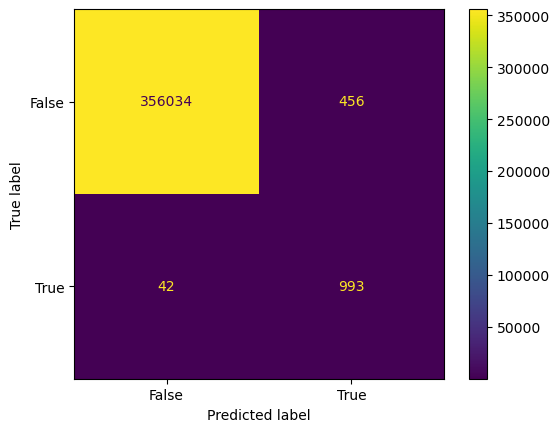

----------------------------------------------------------------------------------------------------
Running GridSearchCV for Bagging+DT
Best Parameters: {'max_samples': 0.8, 'n_estimators': 120}
F1 Score test: 0.8476386036960984
F1 Score train: 1.0
Precision: 0.7371428571428571
Recall: 0.9971014492753624


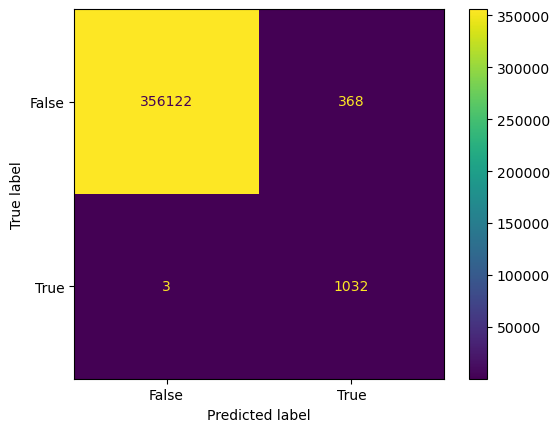

----------------------------------------------------------------------------------------------------
Running GridSearchCV for Boosting+DT
Best Parameters: {'learning_rate': 1, 'n_estimators': 200}
F1 Score test: 0.7211169284467713
F1 Score train: 1.0
Precision: 0.5644808743169399
Recall: 0.9980676328502416


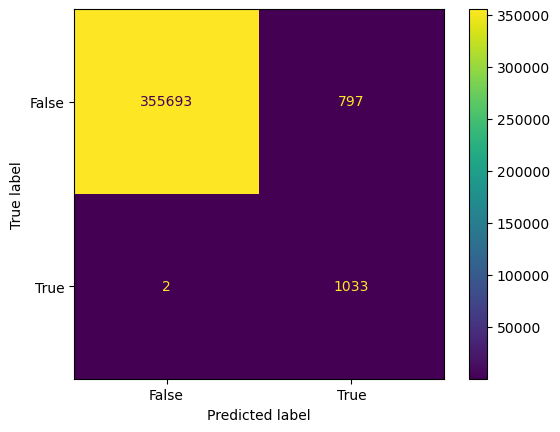

----------------------------------------------------------------------------------------------------
Running GridSearchCV for Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 150}
F1 Score test: 0.9388686131386862
F1 Score train: 1.0
Precision: 0.8893690579083837
Recall: 0.9942028985507246


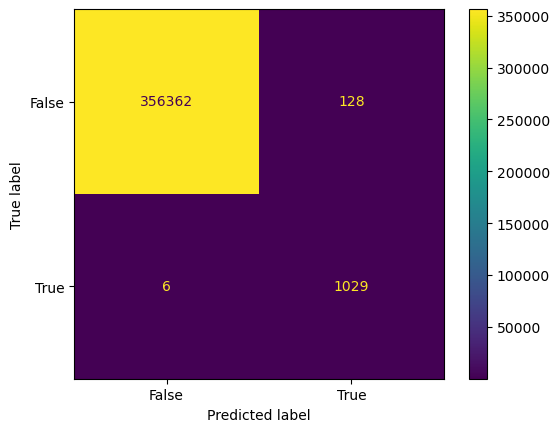

----------------------------------------------------------------------------------------------------

Best Model: RandomForestClassifier
Best Parameters: {'max_depth': 20, 'n_estimators': 150}
F1 Score Score: 0.9388686131386862


In [141]:
# Call the grid_search function with the specified models and hyperparameters
best_model = grid_search(X_cc, Y_cc, X_test, Y_test, models, params)

Running GridSearchCV for KNN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Parameters: {'n_neighbors': 2}
F1 Score test: 0.7080394922425952
F1 Score train: 0.9960574998483653
Precision: 0.5574680732926152
Recall: 0.970048309178744


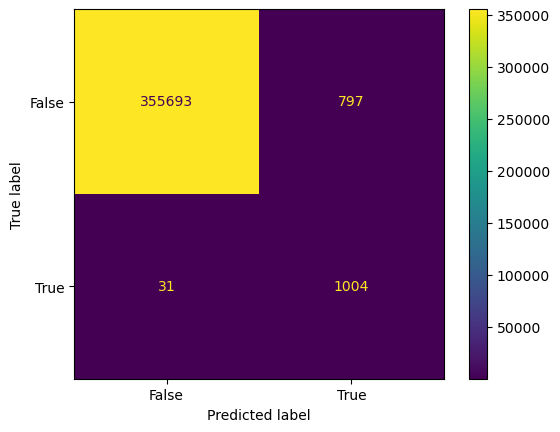

----------------------------------------------------------------------------------------------------
Running GridSearchCV for Bagging+DT
Best Parameters: {'max_samples': 0.5, 'n_estimators': 100}
F1 Score test: 0.8711449091677229
F1 Score train: 0.9993954781767621
Precision: 0.774024024024024
Recall: 0.996135265700483


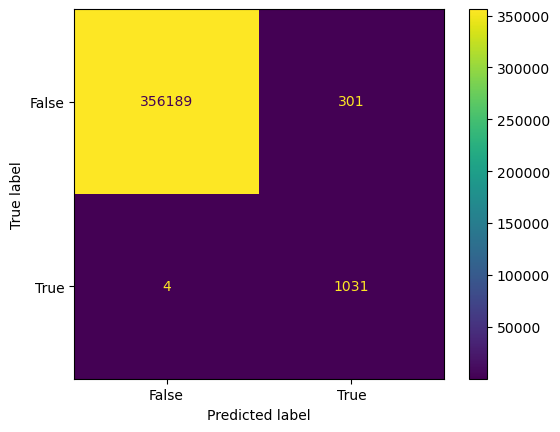

----------------------------------------------------------------------------------------------------
Running GridSearchCV for Boosting+DT
Best Parameters: {'learning_rate': 1, 'n_estimators': 250}
F1 Score test: 0.6550301491589972
F1 Score train: 1.0
Precision: 0.4877126654064272
Recall: 0.9971014492753624


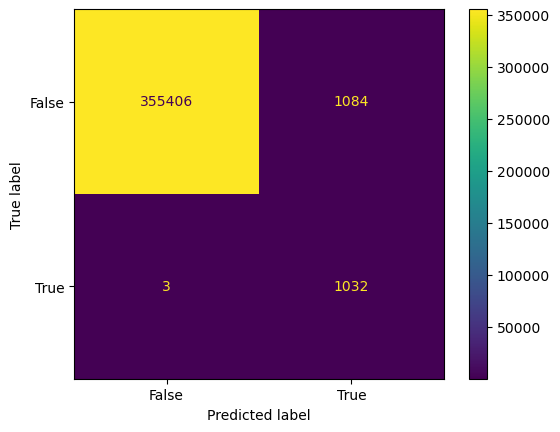

----------------------------------------------------------------------------------------------------
Running GridSearchCV for Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 150}
F1 Score test: 0.9282814614343707
F1 Score train: 0.9999395806899884
Precision: 0.8705583756345178
Recall: 0.9942028985507246


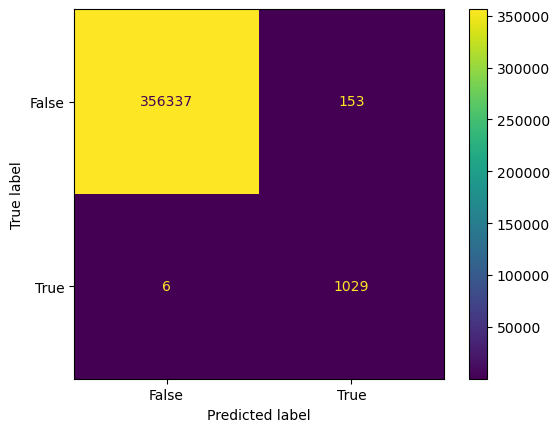

----------------------------------------------------------------------------------------------------

Best Model: RandomForestClassifier
Best Parameters: {'max_depth': 20, 'n_estimators': 150}
F1 Score Score: 0.9282814614343707


In [142]:
# Call the grid_search function with the specified models and hyperparameters
best_model = grid_search(X_SMOTE, Y_SMOTE, X_test, Y_test, models, params)

Running GridSearchCV for KNN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best Parameters: {'n_neighbors': 2}
F1 Score test: 0.4696374971138305
F1 Score train: 0.9979962353512659
Precision: 0.30855582524271846
Recall: 0.9826086956521739


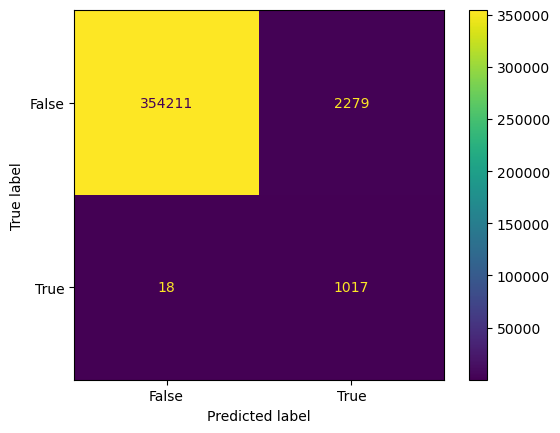

----------------------------------------------------------------------------------------------------
Running GridSearchCV for Bagging+DT
Best Parameters: {'max_samples': 0.8, 'n_estimators': 100}
F1 Score test: 0.6373762376237624
F1 Score train: 1.0
Precision: 0.46882111970869367
Recall: 0.9951690821256038


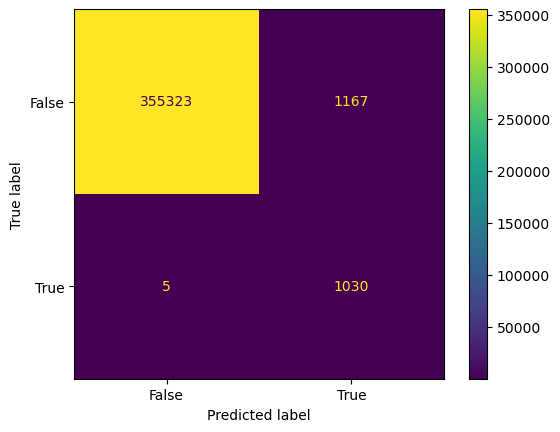

----------------------------------------------------------------------------------------------------
Running GridSearchCV for Boosting+DT
Best Parameters: {'learning_rate': 0.8, 'n_estimators': 250}
F1 Score test: 0.6101393418321969
F1 Score train: 1.0
Precision: 0.44011976047904194
Recall: 0.9942028985507246


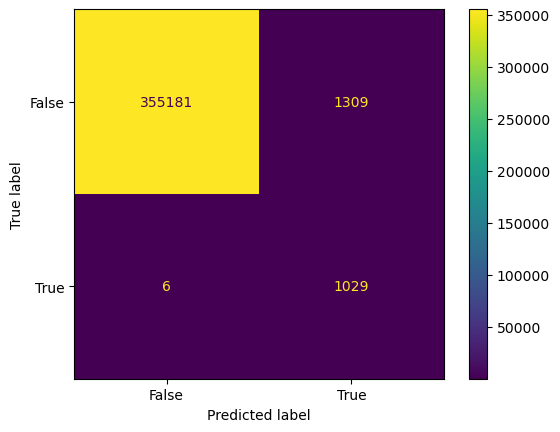

----------------------------------------------------------------------------------------------------
Running GridSearchCV for Random Forest
Best Parameters: {'max_depth': 20, 'n_estimators': 150}
F1 Score test: 0.7862595419847328
F1 Score train: 1.0
Precision: 0.6498422712933754
Recall: 0.9951690821256038


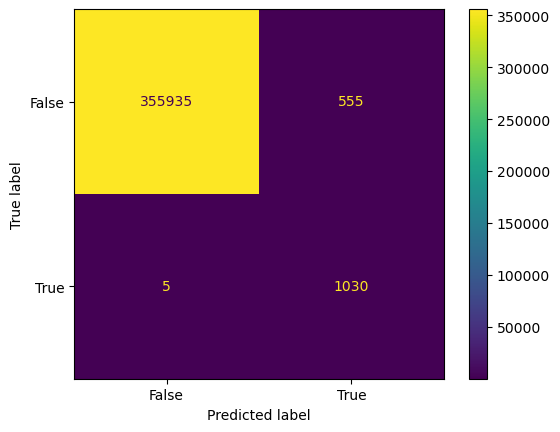

----------------------------------------------------------------------------------------------------

Best Model: RandomForestClassifier
Best Parameters: {'max_depth': 20, 'n_estimators': 150}
F1 Score Score: 0.7862595419847328


In [143]:
# Call the grid_search function with the specified models and hyperparameters
best_model = grid_search(X_ADASYN, Y_ADASYN, X_test, Y_test, models, params)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1 score on training data:  0.8433537832310838
F1 score on test data:  0.01851752166657695
Precision test data:  0.009345540492814258
Recall test data:  0.9971014492753624


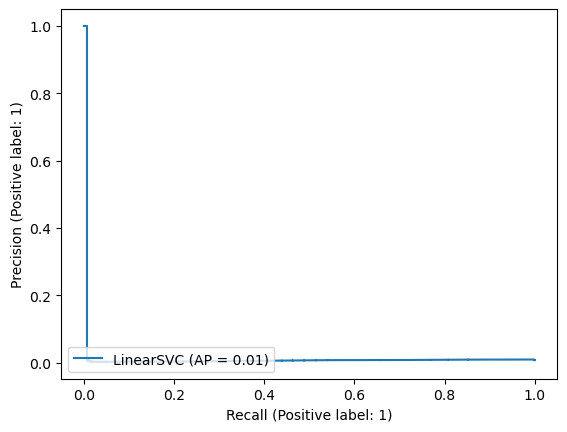

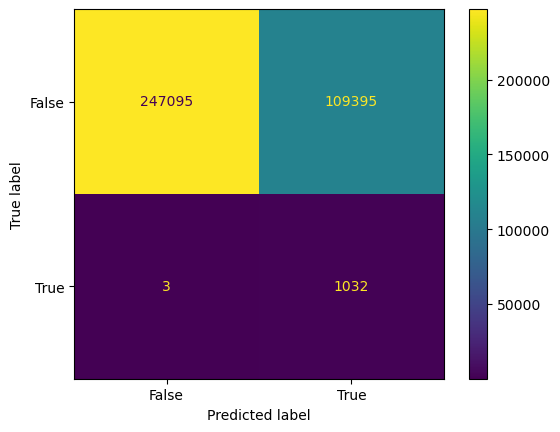

In [144]:
from sklearn.svm import LinearSVC

# Support Vector Machine
svm=LinearSVC(C=100)
svm.fit(X_cc, Y_cc)

X_train_prediction = svm.predict(X_cc)
X_test_prediction= svm.predict(X_test)

training_data_F1Score = get_f1score(Y_cc, X_train_prediction)
test_data_F1Score = get_f1score(Y_test, X_test_prediction)

precision = get_precision(Y_test, X_test_prediction)
recall = get_recall(Y_test, X_test_prediction)

print('F1 score on training data: ', training_data_F1Score)
print('F1 score on test data: ', test_data_F1Score)
print('Precision test data: ', precision)
print('Recall test data: ', recall)
get_AUPRC(svm, "LinearSVC", X_test, Y_test)
get_CM(Y_test,X_test_prediction)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1 score on training data:  0.9432492818384935
F1 score on test data:  0.8742228598756574
Precision test data:  0.865530303030303
Recall test data:  0.8830917874396135


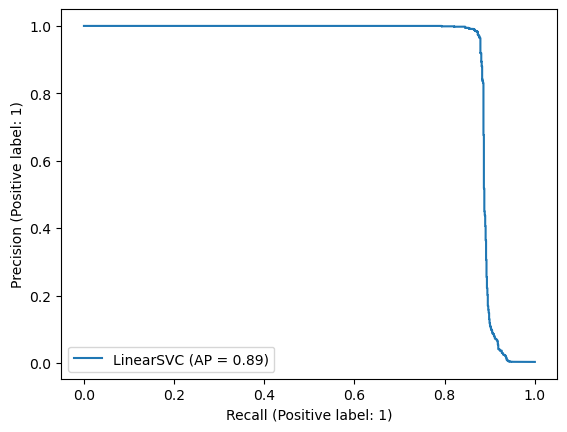

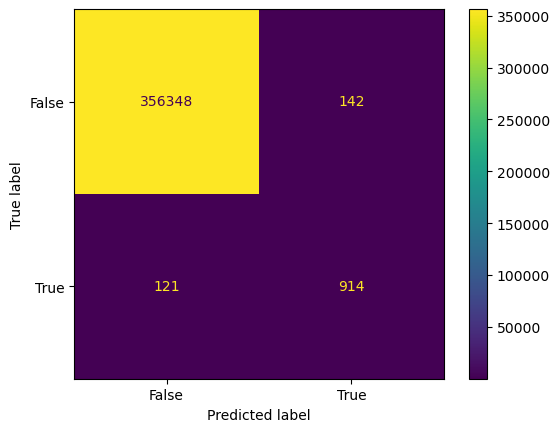

In [145]:
from sklearn.svm import LinearSVC

# Support Vector Machine
svm=LinearSVC(C=100)
svm.fit(X_SMOTE, Y_SMOTE)

X_train_prediction = svm.predict(X_SMOTE)
X_test_prediction= svm.predict(X_test)

training_data_F1Score = get_f1score(Y_SMOTE, X_train_prediction)
test_data_F1Score = get_f1score(Y_test, X_test_prediction)

precision = get_precision(Y_test, X_test_prediction)
recall = get_recall(Y_test, X_test_prediction)

print('F1 score on training data: ', training_data_F1Score)
print('F1 score on test data: ', test_data_F1Score)
print('Precision test data: ', precision)
print('Recall test data: ', recall)
get_AUPRC(svm, "LinearSVC", X_test, Y_test)
get_CM(Y_test,X_test_prediction)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1 score on training data:  0.8865935011835593
F1 score on test data:  0.022945612456824267
Precision test data:  0.011606219945171003
Recall test data:  0.9980676328502416


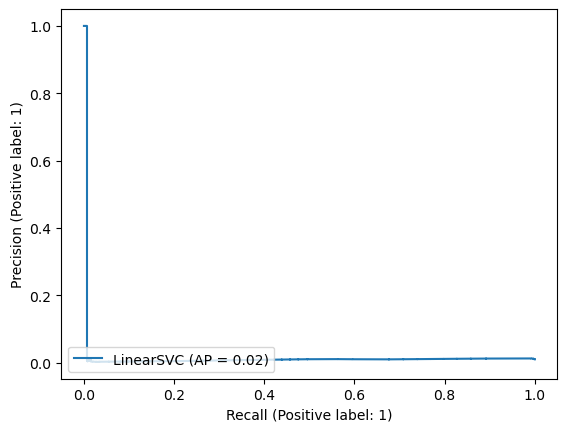

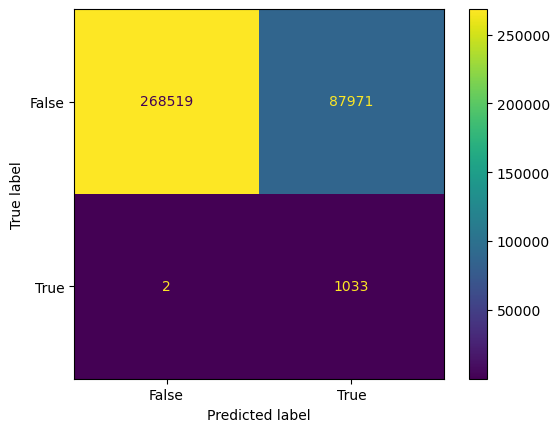

In [146]:
from sklearn.svm import LinearSVC

# Support Vector Machine
svm=LinearSVC(C=100)
svm.fit(X_ADASYN, Y_ADASYN)

X_train_prediction = svm.predict(X_ADASYN)
X_test_prediction= svm.predict(X_test)

training_data_F1Score = get_f1score(Y_ADASYN, X_train_prediction)
test_data_F1Score = get_f1score(Y_test, X_test_prediction)

precision = get_precision(Y_test, X_test_prediction)
recall = get_recall(Y_test, X_test_prediction)

print('F1 score on training data: ', training_data_F1Score)
print('F1 score on test data: ', test_data_F1Score)
print('Precision test data: ', precision)
print('Recall test data: ', recall)
get_AUPRC(svm, "LinearSVC", X_test, Y_test)
get_CM(Y_test,X_test_prediction)

In [147]:
from IPython.display import display, Markdown
# define a title for the table
title = 'Summary'

# display the title and the DataFrame
display(Markdown(f'**{title}**'))
data = {
    'Resample method': ['CC','SMOTE', 'ADASYN','CC','SMOTE', 'ADASYN','CC','SMOTE', 'ADASYN','CC','SMOTE', 'ADASYN'],
    'Classifier': ['KNN ', 'KNN ','KNN ','Bagging+DT','Bagging+DT','Bagging+DT', 'Boosting+DT', 'Boosting+DT','Boosting+DT','Random Forest', 'Random Forest', 'Random Forest'],
    'False positives': [456, 797, 2279, 368, 301, 1167, 797, 1084, 1309, 128, 153, 555],
    'False negatives': [42, 31, 18, 3, 4, 5, 2, 3, 6, 6, 6, 5],
}

display(pd.DataFrame(data))


**Summary**

,Resample method,Classifier,False positives,False negatives
0,CC,KNN,456,42
1,SMOTE,KNN,797,31
2,ADASYN,KNN,2279,18
3,CC,Bagging+DT,368,3
4,SMOTE,Bagging+DT,301,4
5,ADASYN,Bagging+DT,1167,5
6,CC,Boosting+DT,797,2
7,SMOTE,Boosting+DT,1084,3
8,ADASYN,Boosting+DT,1309,6
9,CC,Random Forest,128,6


### Summary
 Models trained with cc has the least total false predictions 

### Building a hybrid model

#### Train the classifiers with the best hyperparameters

In [148]:
knn_best = KNeighborsClassifier(n_neighbors= 2)
bagging_dt_best = BaggingClassifier(base_estimator=DecisionTreeClassifier(),max_samples= 0.8, n_estimators= 120)
boosting_dt_best = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=200,learning_rate=1)
rf_best = RandomForestClassifier(max_depth= 20, n_estimators=150)

X_train = X_cc
y_train = Y_cc

knn_best.fit(X_train, y_train)
bagging_dt_best.fit(X_train, y_train)
boosting_dt_best.fit(X_train, y_train)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=150)

In [149]:
# make predictions using each classifier
knn_preds = knn_best.predict(X_test)
bagging_dt_preds = bagging_dt_best.predict(X_test)
boosting_dt_preds = boosting_dt_best.predict(X_test)
rf_preds = rf_best.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Combine the predictions using a voting classifier

In [150]:
from sklearn.ensemble import VotingClassifier

estimators = [('knn', knn_best), ('bagging_dt', bagging_dt_best), ('boosting_dt', boosting_dt_best), ('rf', rf_best)]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=2)),
                             ('bagging_dt',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                max_samples=0.8,
                                                n_estimators=120)),
                             ('boosting_dt',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 learning_rate=1,
                                                 n_estimators=200)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=150))])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

F1 score on training data:  1.0
F1 score on test data:  0.9527340129749768
Precision test data:  0.9154051647373108
Recall test data:  0.9932367149758454


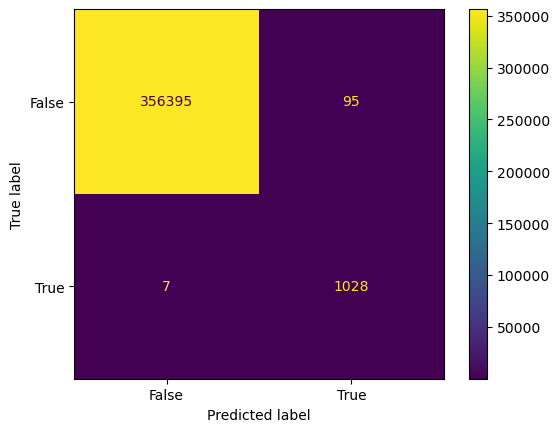

In [151]:
# Evaluate the voting classifier

y_test = Y_test

voting_preds_test = voting_clf.predict(X_test)
voting_preds_train = voting_clf.predict(X_train)

training_F1Score = get_f1score(y_train, voting_preds_train)
test_F1Score = get_f1score(y_test, voting_preds_test)

precision = get_precision(y_test, voting_preds_test)
recall = get_recall(y_test, voting_preds_test)

print('F1 score on training data: ', training_F1Score)
print('F1 score on test data: ', test_F1Score)
print('Precision test data: ', precision)
print('Recall test data: ', recall)
get_CM(y_test,voting_preds_test)

In [160]:
X.columns

Index(['amt', 'gender', 'city_pop', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA', 'state_HI',
       'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY',
       'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN',
       'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE',
       'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH',
       'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD',
       'state_TN', 'state_TX', 'state_UT', 'state

In [161]:
category = 'entertainment'
np.where(X.columns =='category_'+category)[0][0]    

3

In [162]:
state = 'UT'
np.where(X.columns =='state_'+state)[0][0]  

61

In [163]:
cc_type = 'Diners Club - Carte Blanche'
np.where(X.columns =='cc_type_'+cc_type)[0][0]

69

In [164]:
day = 'Thursday'
np.where(X.columns =='day_'+day)[0][0]

79

In [165]:
time_period = 'noon'
np.where(X.columns =='time_period_'+time_period)[0][0]

87

In [166]:
def predict_transaction(amnt,gender,city_pop,category,state,
                        cc_type,day,time_period):
    category_index = np.where(X.columns =='category_'+category)[0][0]  
    state_index = np.where(X.columns =='state_'+state)[0][0]  
    cc_type_index = np.where(X.columns =='cc_type_'+cc_type)[0][0]
    day_index = np.where(X.columns =='day_'+day)[0][0]
    time_period_index = np.where(X.columns =='time_period_'+time_period)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = amnt
    x[1] = gender
    x[2] = city_pop
    
    x[category_index] = 1
    x[state_index] = 1
    x[cc_type_index] = 1
    x[day_index] = 1
    x[time_period_index] = 1
    
    return voting_clf.predict([x])[0]

In [167]:
predict_transaction(43.77,
                    1,
                    519,
                    'health_fitness',
                    'MO',
                    'Diners Club - Carte Blanche',
                    'Tuesday',
                    'night')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0

In [168]:
import pickle
with open('ccfd.pickle','wb') as f:
    pickle.dump(voting_clf,f)

In [169]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [179]:
def check_fraud(input_file):
    # Load input CSV file
    input_df = pd.read_csv(input_file)
    
    # Load CCFD model from pickle file
    with open('ccfd.pickle', 'rb') as f:
        model = pickle.load(f)
    
    # Apply CCFD model to input data and save results to output CSV file
    input_df['is_fraud'] = model.predict(input_df)
    
    # split the input DataFrame into fraud and legit DataFrames
    fraud_df = input_df[input_df['is_fraud'] == 1]
    legit_df = input_df[input_df['is_fraud'] == 0]
    
    input_df.to_csv('output.csv', index=False)
    fraud_df.to_csv('fraud.csv', index=False)
    legit_df.to_csv('legit.csv', index=False)
    
    # Display statistics about results
    num_fraud = input_df['is_fraud'].sum()
    total_records = len(input_df)
    fraud_pct = num_fraud / total_records * 100
    print(f'Total number of fraud transactions: {num_fraud} out of {total_records} records ({fraud_pct:.2f}%)')

In [180]:
check_fraud('testData.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostC

Total number of fraud transactions: 1123 out of 357525 records (0.31%)


In [204]:
def preprocess_data(filename):
    # Load data from csv file
    df = pd.read_csv(filename)
    
    # Replace values in gender field
    df['gender'].replace({1: 'M', 0: 'F'}, inplace=True)
    
    # Perform reverse one-hot encoding on day columns
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df['day'] = df[[f'day_{day}' for day in days]].apply(lambda x: days[x.values.argmax()], axis=1)
    df.drop([f'day_{day}' for day in days], axis=1, inplace=True) 
    
    # Perform reverse one-hot encoding on category columns
    categories = ['entertainment', 'food_dining', 'gas_transport',
                'grocery_net', 'grocery_pos', 'health_fitness',
                'home', 'kids_pets', 'misc_net', 'misc_pos',
                'personal_care', 'shopping_net', 'shopping_pos',
                'travel']
    df['category'] = df[[f'category_{category}' for category in categories]].apply(lambda x: categories[x.values.argmax()], axis=1)
    df.drop([f'category_{category}' for category in categories], axis=1, inplace=True) 
    
    # Perform reverse one-hot encoding on state columns
    states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 
              'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 
              'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 
              'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
    df['state'] = df[[f'state_{state}' for state in states]].apply(lambda x: states[x.values.argmax()], axis=1)
    df.drop([f'state_{state}' for state in states], axis=1, inplace=True) 
    
    # Perform reverse one-hot encoding on cc_type columns
    cc_types=['American Express', 'Diners Club - Carte Blanche', 'Discover', 'JCB', 'MasterCard', 'Other', 'Visa']
    df['cc_type'] = df[[f'cc_type_{cc_type}' for cc_type in cc_types]].apply(lambda x: cc_types[x.values.argmax()], axis=1)
    df.drop([f'cc_type_{cc_type}' for cc_type in cc_types], axis=1, inplace=True) 
    
    # Perform reverse one-hot encoding on time_period columns
    time_periods = ['afternoon', 'dawn', 'evening', 'morning', 'night', 'noon']
    df['time_period'] = df[[f'time_period_{time_period}' for time_period in time_periods]].apply(lambda x: time_periods[x.values.argmax()], axis=1)
    df.drop([f'time_period_{time_period}' for time_period in time_periods], axis=1, inplace=True)
    
    # Save processed data to csv file
    df.to_csv(f'processed_{filename}.csv', index=False)
    
    return df

In [203]:
preprocess_data('legit.csv')

,amt,gender,city_pop,is_fraud,day,category,state,cc_type,time_period
0,119.60,F,213,0,Saturday,grocery_pos,PA,Visa,dawn
1,212.47,F,310,0,Friday,kids_pets,NM,JCB,afternoon
2,74.97,F,34153,0,Friday,grocery_pos,TX,Diners Club - Carte Blanche,evening
3,68.42,F,36438,0,Friday,shopping_net,AR,Discover,noon
4,65.59,M,910148,0,Thursday,grocery_pos,IN,Visa,dawn
...,...,...,...,...,...,...,...,...,...
356397,8.61,F,118,0,Wednesday,misc_pos,OH,Visa,morning
356398,138.62,M,105549,0,Tuesday,home,CA,Visa,night
356399,69.25,F,16183,0,Thursday,kids_pets,WV,Visa,afternoon
356400,8.89,F,18128,0,Tuesday,shopping_pos,TX,Visa,evening


In [207]:
import requests
import datetime

# function to validate credit card using API
def validate_credit_card(card_number):
    response = requests.get(f'https://api.creditcardvalidator.co/validate?card_number={card_number}&apikey=YOUR_API_KEY')
    if response.status_code == 200:
        return response.json()['valid']
    else:
        return False

# function to get state using API
def get_state(latitude, longitude):
    response = requests.get(f'https://api.geocod.io/v1.6/reverse?q={latitude},{longitude}&api_key=YOUR_API_KEY')
    if response.status_code == 200:
        return response.json()['results'][0]['address_components']['state']
    else:
        return None

# function to get city population using API
def get_city_population(city_name):
    response = requests.get(f'https://api.census.gov/data/2019/pep/population?get=POP&for=place:*&in=state:*&NAME={city_name}&key=YOUR_API_KEY')
    if response.status_code == 200:
        return int(response.json()[1][0])
    else:
        return None

# get user inputs
gender = input('Enter your gender (M/F/O): ')
amount = float(input('Enter the amount in dollars: '))
category = input('Enter the category of the payment: ')
latitude = float(input('Enter your current latitude: '))
longitude = float(input('Enter your current longitude: '))
transaction_time = datetime.datetime.now().strftime('%H:%M:%S')
transaction_day = datetime.datetime.now().strftime('%A')
city_name = input('Enter the city name you are currently in: ')
city_population = get_city_population(city_name)

# validate credit card
credit_card_number = input('Enter your credit card number: ')
if validate_credit_card(credit_card_number):
    print('Credit card is valid')
else:
    print('Credit card is invalid')

# get state using API
state = get_state(latitude, longitude)

# print transaction details
print(f'Gender: {gender}')
print(f'Amount: ${amount:.2f}')
print(f'Category: {category}')
print(f'Location: {city_name}, {state}')
print(f'Time: {transaction_time}')
print(f'Day: {transaction_day}')
print(f'Population of the city: {city_population}')

Enter your gender (M/F/O): m
Enter the amount in dollars: 64654
Enter the category of the payment: homr
Enter your current latitude: 5454
Enter your current longitude: 54
Enter the city name you are currently in: hfh


JSONDecodeError: Expecting value: line 2 column 1 (char 1)